## Select stocks
sort the stocks by "CAPITALIZATION" in this factor_loading.csv file and select the top 1000 stocks for your future calculations (Please use TICKER as the unique id for each stock).

In [1]:
%pylab inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [2]:
# read factor loading as a dataframe
factor_data = pd.read_csv("factor_loading.csv", skipinitialspace=True)

In [3]:
factor_data.head() # take a look

,ID,TICKER,CUSIP,NAME,HBTA,BETA,SRISK%,TRISK%,VOLTILTY,MOMENTUM,...,SAPVAL,SAPGRO,MIDCAP,MIDVAL,MIDGRO,SC600,SCVAL,SCGRO,E3ESTU,INTRA_MONTH_ADDITION
0,USA06D1,TBLZ,89278P10,TRAILBLAZER RES INC,2.421,2.260,55.626,69.456,5.000,-0.448,...,0,0,0,0,0,0,0,0,0,0
1,USA06F1,NSPR,45779A30,INSPIREMD INC,1.947,2.068,46.694,63.017,4.438,-4.679,...,0,0,0,0,0,0,0,0,0,0
2,USA06G1,LYNS,53228J10,LIGHTYEAR NETWORK SOLUTIONS IN,5.000,2.101,57.673,71.423,5.000,-3.618,...,0,0,0,0,0,0,0,0,0,0
3,USA06S1,MPSP,58504M10,MEDPRO SAFETY PRODUCTS INC,-3.000,1.264,46.854,55.111,1.690,-2.289,...,0,0,0,0,0,0,0,0,0,0
4,USA06Z1,MDXG,60249610,MIMEDX GROUP INC,-0.433,0.923,35.071,44.365,1.985,4.160,...,0,0,0,0,0,0,0,0,0,0


In [4]:
factor_data=factor_data.rename(columns=lambda x: x.strip())  # strip annoying space in column strings

In [5]:
factor_data.sort('CAPITALIZATION', ascending=False, inplace=True)  # sort by 'CAPTALIZATION'

In [6]:
universe = factor_data[0:1000].TICKER.map(lambda x: x.strip()).values   # TICKS of stocks in the universe

In [8]:
print universe[:20]  # take a look

['AAPL' 'XOM' 'GOOG' 'MSFT' 'JNJ' 'GE' 'WMT' 'CVX' 'WFC' 'CHL' 'PG' 'NSRGF'
 'NSRGY' 'TM' 'IBM' 'ITCTY' 'NVS' 'HBC' 'JPM' 'PFE']


## Construct time series of daily return for each of the stocks in the universe

In [9]:
from datetime import datetime
import fnmatch
import os

def parse_date(s):  # parse date from the data file name
    year = int(s[0:4])
    month = int(s[4:6])
    day = int(s[6:8])
    return datetime(year=year, month=month, day=day)

In [10]:
in_dir = "./price_data_2013/"
prices = pd.DataFrame(columns=np.append('time', universe))  # make a dataframe to hold price time series of 1000 stocks

for f in os.listdir(in_dir):  # read in data from file into prices dataframe 
    if fnmatch.fnmatch(f, '*.txt'):
        s=f.split('.')[1]
        t = parse_date(s)
        df = pd.read_csv(in_dir+f, sep='\t')
        new_row = {'time':t}
        for stock in universe:
            if stock in df.ticker.values:
                new_row.update({stock:(df[df['ticker']==stock].adjClose.values)[0]})
        prices = prices.append(new_row, ignore_index=True)
        del new_row, df

In [11]:
prices.set_index('time', inplace=True)
prices.head()

,AAPL,XOM,GOOG,MSFT,JNJ,GE,WMT,CVX,WFC,CHL,...,LKQ,BKEAF,ADT,VOPKY,CGEMY,MGM,WGP,ZODFY,EQIX,AUY
time,,,,,,,,,,,,,,,,,,,,,
2013-09-03,488.58,87.15,860.38,31.88,86.42,23.06,72.68,120.55,41.39,54.78,...,NaN,NaN,39.14,NaN,NaN,17.97,NaN,NaN,176.93,11.50
2013-09-04,498.76,87.76,871.85,31.18,86.90,23.17,72.91,120.86,41.50,54.80,...,NaN,NaN,39.11,NaN,NaN,18.25,NaN,NaN,176.35,11.51
2013-09-05,495.27,87.35,879.56,31.24,87.04,23.16,72.67,121.37,41.82,55.23,...,NaN,NaN,39.95,NaN,NaN,18.29,NaN,NaN,176.66,11.02
2013-09-06,498.22,87.25,879.58,31.16,87.16,23.16,72.59,121.21,41.43,55.78,...,NaN,NaN,39.48,NaN,NaN,18.42,NaN,NaN,172.77,11.25
2013-09-09,506.18,88.04,887.88,31.65,87.56,23.39,73.51,122.22,41.72,56.29,...,NaN,NaN,39.97,NaN,NaN,18.74,NaN,NaN,177.26,11.11


In [13]:
prices = prices.astype(np.float64)   # make sure all elements are numbers

In [14]:
returns = prices.diff()/prices  # time series of (1000 stocks) returns as a dataframe

In [15]:
returns.head() # take a look

,AAPL,XOM,GOOG,MSFT,JNJ,GE,WMT,CVX,WFC,CHL,...,LKQ,BKEAF,ADT,VOPKY,CGEMY,MGM,WGP,ZODFY,EQIX,AUY
time,,,,,,,,,,,,,,,,,,,,,
2013-09-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-09-04,0.020411,0.006951,0.013156,-0.022450,0.005524,0.004748,0.003155,0.002565,0.002651,0.000365,...,NaN,NaN,-0.000767,NaN,NaN,0.015342,NaN,NaN,-0.003289,0.000869
2013-09-05,-0.007047,-0.004694,0.008766,0.001921,0.001608,-0.000432,-0.003303,0.004202,0.007652,0.007786,...,NaN,NaN,0.021026,NaN,NaN,0.002187,NaN,NaN,0.001755,-0.044465
2013-09-06,0.005921,-0.001146,0.000023,-0.002567,0.001377,0.000000,-0.001102,-0.001320,-0.009413,0.009860,...,NaN,NaN,-0.011905,NaN,NaN,0.007058,NaN,NaN,-0.022515,0.020444
2013-09-09,0.015726,0.008973,0.009348,0.015482,0.004568,0.009833,0.012515,0.008264,0.006951,0.009060,...,NaN,NaN,0.012259,NaN,NaN,0.017076,NaN,NaN,0.025330,-0.012601


In [16]:
# All factors we will need in this problem
factors = ['VOLTILTY', 'MOMENTUM', 'SIZE', 'SIZENONL',\
           'TRADEACT', 'GROWTH', 'EARNYLD', 'VALUE', 'EARNVAR', 'LEVERAGE', 'CURRSEN', 'YIELD']

In [17]:
factor_data = factor_data[0:1000]  # first 1000 stocks
factor_data.set_index('TICKER', inplace=True)  #  change index

In [18]:
# drop factors that are not used from factor_data dataframe
for s in factor_data.columns:
    if s not in factors:
        factor_data.drop(s, axis=1, inplace=True)

In [19]:
factor_data.index=factor_data.index.map(lambda x: x.strip())  # remove annoying spaces in index
factor_data.head()  # take a look

,VOLTILTY,MOMENTUM,SIZE,SIZENONL,TRADEACT,GROWTH,EARNYLD,VALUE,EARNVAR,LEVERAGE,CURRSEN,YIELD
AAPL,0.152,-1.227,1.849,0.197,0.823,1.505,0.763,-0.334,0.155,-1.264,0.376,0.142
XOM,-1.107,-0.560,1.835,0.197,-0.599,-0.078,0.850,0.016,-0.102,-1.552,-0.021,0.286
GOOG,-0.807,0.234,1.573,0.197,-0.462,0.774,-0.308,-0.436,-0.280,-1.164,0.583,-1.050
MSFT,0.287,-0.580,1.495,0.197,-0.694,0.044,0.556,-0.418,-0.175,-1.426,-0.067,0.423
JNJ,-0.735,0.159,1.486,0.197,-0.464,-0.280,-0.078,-0.426,-0.551,-1.370,0.273,0.455


In [20]:
returns=returns.ix[1:] # drop first row which doesn't have return defined
returns.head()

,AAPL,XOM,GOOG,MSFT,JNJ,GE,WMT,CVX,WFC,CHL,...,LKQ,BKEAF,ADT,VOPKY,CGEMY,MGM,WGP,ZODFY,EQIX,AUY
time,,,,,,,,,,,,,,,,,,,,,
2013-09-04,0.020411,0.006951,0.013156,-0.022450,0.005524,0.004748,0.003155,0.002565,0.002651,0.000365,...,NaN,NaN,-0.000767,NaN,NaN,0.015342,NaN,NaN,-0.003289,0.000869
2013-09-05,-0.007047,-0.004694,0.008766,0.001921,0.001608,-0.000432,-0.003303,0.004202,0.007652,0.007786,...,NaN,NaN,0.021026,NaN,NaN,0.002187,NaN,NaN,0.001755,-0.044465
2013-09-06,0.005921,-0.001146,0.000023,-0.002567,0.001377,0.000000,-0.001102,-0.001320,-0.009413,0.009860,...,NaN,NaN,-0.011905,NaN,NaN,0.007058,NaN,NaN,-0.022515,0.020444
2013-09-09,0.015726,0.008973,0.009348,0.015482,0.004568,0.009833,0.012515,0.008264,0.006951,0.009060,...,NaN,NaN,0.012259,NaN,NaN,0.017076,NaN,NaN,0.025330,-0.012601
2013-09-10,-0.023309,-0.002505,0.000889,0.022545,0.010957,0.020109,0.006084,0.006422,0.017197,0.019338,...,NaN,NaN,0.013086,NaN,NaN,0.015756,NaN,NaN,-0.000169,-0.048113


In [21]:
# wait a minute, you say there're some stocks cannot be found in the data file?
from copy import deepcopy
drop_stocks = list(deepcopy(universe))

In [22]:
# find the missing stocks
for f in os.listdir(in_dir):
    if fnmatch.fnmatch(f, '*.txt'):
        df = pd.read_csv(in_dir+f, sep='\t')
        for stock in drop_stocks:
            if stock in df.ticker.values:
                drop_stocks.remove(stock)
        del df

In [25]:
print drop_stocks[:20] # take a look

['NSRGF', 'ITCTY', 'CICHY', 'CICHF', 'AHBIF', 'BRK.A', 'BRK.B', 'GLAXF', 'RYDAF', 'RDS.A', 'CBAUF', 'CMWAY', 'BHPLF', 'BTAFF', 'OGZPY', 'BAYZF', 'BAYRY', 'TCEHY', 'RDS.B', 'RYDBF']


In [26]:
len(drop_stocks)

381

## You are not lying! 381 out of 1000 stocks data is missing!!!

In [27]:
factor_data.drop(drop_stocks, axis=0, inplace=True)
print factor_data.shape

(619, 12)


In [28]:
returns.drop(drop_stocks, axis=1, inplace=True)
print returns.shape

(20, 619)


In [29]:
# still we have NaN values, we don't want to drop columns or rows to lose information
# we fill na with mean value. (the returns of the same stock)
from sklearn.preprocessing import Imputer

returns_array = returns.values
imp = Imputer(missing_values='NaN', strategy='mean', axis=1)
returns_array = imp.fit_transform(returns_array)

In [30]:
factor_array = factor_data.values  # X arrays of regression

In [31]:
# now for each day, we fit return (of each stock) over factor loading to get factor returns (of each day)
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

In [32]:
factor_returns = pd.DataFrame(columns=np.append('time', factors))
i=0
days = returns.index

# do regression everyday to get factor return
for day in days:   
    y=returns_array[i]
    model.fit(factor_array, y)
    factor_return = model.coef_
    new_row = {'time':day}
    new_row.update(dict(zip(factors, factor_return)))
    factor_returns = factor_returns.append(new_row, ignore_index=True)
    i+=1
    

In [33]:
# time series of 12 factor returns
factor_returns.set_index('time', inplace=True)
factor_returns

,VOLTILTY,MOMENTUM,SIZE,SIZENONL,TRADEACT,GROWTH,EARNYLD,VALUE,EARNVAR,LEVERAGE,CURRSEN,YIELD
time,,,,,,,,,,,,
2013-09-04,0.002650,0.001279,0.000009,-0.011328,0.000346,-0.000648,0.001637,0.000017,0.000108,-0.002140,-0.001481,-0.002106
2013-09-05,-0.000089,0.000001,-0.002687,0.021781,-0.001172,0.000067,0.001081,0.001069,0.001669,-0.000123,0.000123,-0.002380
2013-09-06,0.000771,-0.003330,-0.000978,0.007989,-0.001471,0.001845,-0.000551,0.000334,-0.000456,0.001295,0.002102,0.000785
2013-09-09,0.007429,-0.000418,-0.002469,0.045039,-0.002817,-0.001266,-0.001585,-0.000952,0.002143,-0.003537,-0.002199,0.002985
2013-09-10,0.001391,0.001535,-0.001071,0.019088,-0.002240,0.000062,0.001680,-0.000423,-0.000074,0.000532,-0.003346,-0.001442
2013-09-11,0.001242,-0.000025,0.000995,0.001399,0.000196,-0.000317,-0.000472,0.000017,-0.002090,0.000264,0.000511,-0.001014
2013-09-12,-0.003107,0.001509,0.002493,-0.016649,-0.000260,-0.001351,-0.001075,-0.000243,0.000059,-0.000464,-0.001525,-0.000184
2013-09-13,0.001141,0.000558,-0.004135,0.065328,0.000214,-0.000655,0.001807,-0.000709,-0.000030,0.000105,0.000106,0.000369
2013-09-16,-0.000043,0.000644,-0.001487,0.001426,-0.001307,-0.001706,0.001884,-0.000546,-0.000443,-0.000122,-0.001770,-0.001086


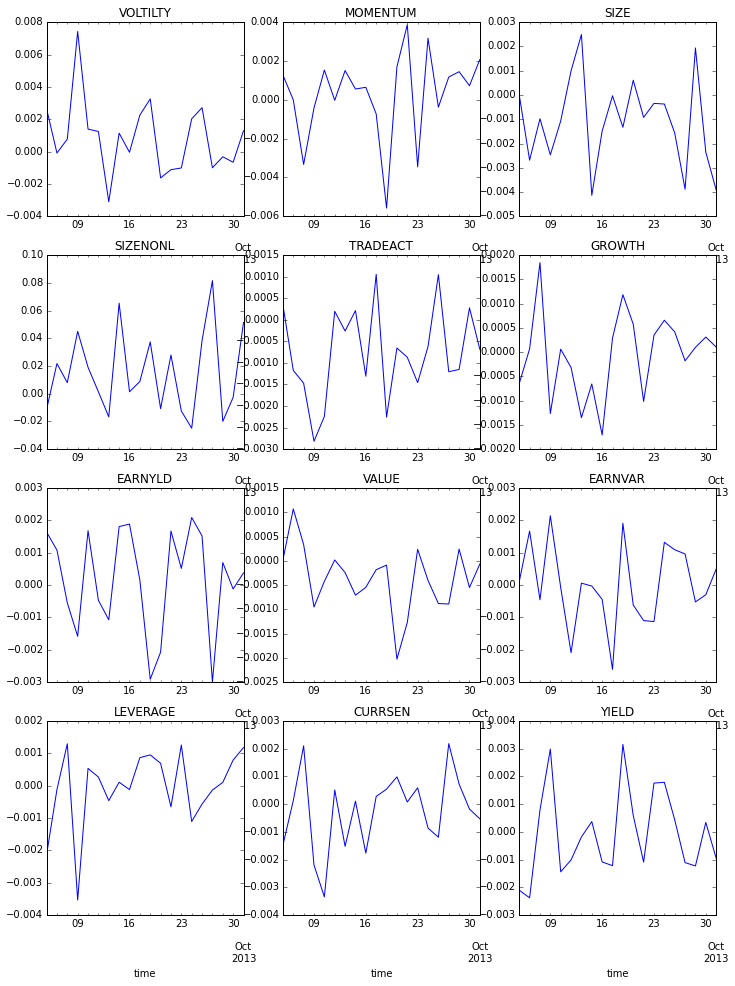

In [34]:
# Plot 12 time series
fig = plt.figure(figsize=(12,16))
ax1 = fig.add_subplot(4, 3, 1)
ax2 = fig.add_subplot(4, 3, 2)
ax3 = fig.add_subplot(4, 3, 3)
ax4 = fig.add_subplot(4, 3, 4)
ax5 = fig.add_subplot(4, 3, 5)
ax6 = fig.add_subplot(4, 3, 6)
ax7 = fig.add_subplot(4, 3, 7)
ax8 = fig.add_subplot(4, 3, 8)
ax9 = fig.add_subplot(4, 3, 9)
ax10 = fig.add_subplot(4, 3, 10)
ax11 = fig.add_subplot(4, 3, 11)
ax12 = fig.add_subplot(4, 3, 12)
factor_returns['VOLTILTY'].plot(ax=ax1, title='VOLTILTY')
factor_returns['MOMENTUM'].plot(ax=ax2, title='MOMENTUM')
factor_returns['SIZE'].plot(ax=ax3, title='SIZE')
factor_returns['SIZENONL'].plot(ax=ax4, title='SIZENONL')
factor_returns['TRADEACT'].plot(ax=ax5, title='TRADEACT')
factor_returns['GROWTH'].plot(ax=ax6, title='GROWTH')
factor_returns['EARNYLD'].plot(ax=ax7, title='EARNYLD')
factor_returns['VALUE'].plot(ax=ax8, title='VALUE')
factor_returns['EARNVAR'].plot(ax=ax9, title='EARNVAR')
factor_returns['LEVERAGE'].plot(ax=ax10, title='LEVERAGE')
factor_returns['CURRSEN'].plot(ax=ax11, title='CURRSEN')
factor_returns['YIELD'].plot(ax=ax12, title='YIELD')